# Plot reconstructed data heatmap next to actual data heatmap

In [4]:
import os
import flow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tensortools as tt
import seaborn as sns
import pandas as pd
from copy import deepcopy
from cascade import df
from cascade import tca
from cascade import paths

In [10]:
# def singleday_varex_summary(
mouse = 'OA27'
trace_type='zscore_day'
method='ncp_bcd'
cs=''
warp=False
word='ratios'
verbose=False
r = 10
"""
Plot reconstruction error as variance explained across all days for
TCA decomposition ensembles.

Parameters:
-----------
mouse : str; mouse name
trace_type : str; dff, zscore, deconvolved
method : str; TCA fit method from tensortools

Returns:
--------
Saves figures to .../analysis folder  .../qc
"""

'\nPlot reconstruction error as variance explained across all days for\nTCA decomposition ensembles.\n\nParameters:\n-----------\nmouse : str; mouse name\ntrace_type : str; dff, zscore, deconvolved\nmethod : str; TCA fit method from tensortools\n\nReturns:\n--------\nSaves figures to .../analysis folder  .../qc\n'

In [ ]:
pars = {'trace_type': trace_type, 'cs': cs, 'warp': warp}

days = flow.metadata.DateSorter.frommeta(mice=[mouse], tags=None)

cmap = sns.color_palette(sns.cubehelix_palette(len(days)))

for c, day1 in enumerate(days, 0):
    
    # create figure and axes
    buffer = 5
    right_pad = 5
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(100, 100, figure=fig, left=0.05, right=.95, top=.95, bottom=0.05)
    ax0 = fig.add_subplot(gs[10:90-buffer, 5:45-right_pad])
    ax1 = fig.add_subplot(gs[10:90-buffer, 50:90-right_pad])
#     axC = fig.add_subplot(gs[20:80-buffer, 97:98])

#     day1 = day[0]
    # load dirs
    load_dir = paths.tca_path(mouse, 'single', pars=pars, word=word)
    tensor_path = os.path.join(load_dir, str(day1.mouse) + '_'
                               + str(day1.date) + '_single_decomp_'
                               + str(trace_type) + '.npy')
    input_tensor_path = os.path.join(load_dir, str(day1.mouse) + '_'
                                     + str(day1.date) + '_single_tensor_'
                                     + str(trace_type) + '.npy')
    if not os.path.isfile(tensor_path): continue
    if not os.path.isfile(input_tensor_path): continue

    # save dirs
    save_dir = paths.tca_plots(mouse, 'single', pars=pars, word=word)
    save_dir = os.path.join(save_dir, 'reconstructions')
    if not os.path.isdir(save_dir): os.mkdir(save_dir)
    var_path = os.path.join(save_dir, str(day1.mouse) + '_'
                               + str(day1.date) + '_recon_heatmap.pdf')

    # load your data
    ensemble = np.load(tensor_path)
    ensemble = ensemble.item()
    V = ensemble[method]
    X = np.load(input_tensor_path)
    bU = V.results[r][0].factors.full()
    
#     plt.figure()
    # red=high, white=middle, blue=low colormap
    vmax = np.nanmax(np.concatenate((np.nanmean(bU[:,:,:],2).flatten(), np.nanmean(X[:,:,:],2).flatten())))
#     cmap = sns.light_palette((10, 80, 50), input="husl", as_cmap=True)
#     cmap
    im0 = ax0.imshow(np.nanmean(X[:,:,:],2), vmin=0, vmax=vmax)
    fig.colorbar(im0, ax=ax0)
#     plt.figure()
    im1 = ax1.imshow(np.nanmean(bU[:,:,:],2), vmin=0, vmax=vmax)
    fig.colorbar(im1, ax=ax1)

    ax0.set_title('Data')
    ax0.set_ylabel('Cell Number')
    ax0.set_xlabel('Time (sec)')
    ax1.set_title('TCA Model')
    ax1.set_ylabel('Cell Number')
    ax1.set_xlabel('Time (sec)')
    
    # reset xticklabels
    xticklabels = np.array([0, 1, 2, 3, 4, 5])
#     xticklabels = xticklabels[(xticklabels > times[0]) & (xticklabels < times[-1])]
    xticks = np.array([15, 30, 45, 60, 75, 90])
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticklabels, rotation='horizontal')
    ax0.set_xticks(xticks)
    ax0.set_xticklabels(xticklabels, rotation='horizontal')
    fig.savefig(var_path, bbox_inches='tight')
#     vmin, vmax = ax1.clim()
#     ax1.set_clim(vmin=vmin, vmax=vmax)
    
    
    # get reconstruction error as variance explained
#     var, var_s, x, x_s = [], [], [], []
# #     for r in V.results
#     bU = V.results[r][0].factors.full()
#     var.append((np.var(X) - np.var(X - bU)) / np.var(X))
#     x.append(r)
#     for it in range(0, len(V.results[r])):
#         U = V.results[r][it].factors.full()
#         var_s.extend([(np.var(X) - np.var(X - U)) / np.var(X)])
#         x_s.extend([r])
#     break

#     # mean response of neuron across trials
#     mU = np.mean(X, axis=2, keepdims=True) * np.ones((1, 1, np.shape(X)[2]))
#     var_mean = (np.var(X) - np.var(X - mU)) / np.var(X)

#     # smoothed response of neuron across time
#     smU = np.convolve(X.reshape((X.size)), np.ones(5, dtype=np.float64)/5, 'same').reshape(np.shape(X))
#     var_smooth = (np.var(X) - np.var(X - smU)) / np.var(X)

    # plot
#     R = np.max([r for r in V.results.keys()])
#     ax.scatter(x_s, var_s, color=cmap[c], alpha=0.5)
#     ax.scatter([R+2], var_mean, color=cmap[c], alpha=0.5)
#     ax.scatter([R+4], var_smooth, color=cmap[c], alpha=0.5)
#     ax.plot(x, var, label=('single ' + str(c)), color=cmap[c])
#     ax.plot([R+1.5, R+2.5], [var_mean, var_mean], color=cmap[c])
#     ax.plot([R+3.5, R+4.5], [var_smooth, var_smooth], color=cmap[c])

# # add labels/titles
# x_labels = [str(R) for R in V.results]
# x_labels.extend(['', 'mean\n cell\n response', '', 'smooth\n response\n (0.3s)'])
# ax.set_xticks(range(1, len(V.results) + 5))
# ax.set_xticklabels(x_labels)
# ax.set_xlabel('model rank')
# ax.set_ylabel('fractional variance explained')
# ax.set_title('Variance Explained: ' + str(method) + ', ' + mouse)
# ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# fig.savefig(var_path, bbox_inches='tight')

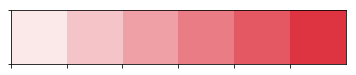

In [56]:
sns.palplot(sns.light_palette((10, 80, 50), input="husl"))